In [1]:
import pandas as pd
import requests
import pyproj
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mapclassify import NaturalBreaks

from fonction import ligne, nom_de_colonne, carte_1_an_rapide, carte_1_an, carte_1_an_bis, region_sans_dom, academie_sans_dom ,carte_fest_marche, lecture_fichier, data_1_an, carte_fest, hist_date_festi, hist_date_pano, into_md, carte_fest_debug, festi_sans_dom, festi_sans_dom_shapefile, make_fond_carte

In [2]:
#Lecture du fichier voulu
festi = lecture_fichier("festival", "csv")
shp_festi = lecture_fichier("festival", "shp")
fond_de_carte = lecture_fichier("carte_region", "shp")

#convertit le fichier shp complet en un fichier sans dom tom
shp_sans_dom = festi_sans_dom_shapefile(shp_festi)
reg_sans_dom = region_sans_dom(fond_de_carte)

Avant la condition, nombre de lignes = 7259
Après la condition, nombre de lignes = 7117


C:\Users\lilou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [3]:
#Génere le fond de carte tout seul
def make_fond_carte(fond_de_carte):
    fig, ax = plt.subplots(figsize=(12, 6))
    fond_de_carte.plot(ax=ax, color='lightgray', edgecolor='black')
    return ax

In [4]:
#Génere une carte de la france avec les emplacements des festivals 
def carte(emplacements_festivals, ax, annee):
    # Cette fonction marche si on a déja convertit les valeurs en numérique et remplacé toutes les valeurs qui ne sont pas numériques par des NaN

    # On enlève les lignes dont la date de création est différente de celle donnée en argument
    emplacements = emplacements_festivals[emplacements_festivals['annee_de_cr'] == annee]

    # On affiche les emplacements des festivals
    layer = emplacements.plot(ax=ax, color='red', marker='o', markersize=5)

    # On affiche un titre à la carte
    # plt.title(f'Carte des Festivals en France créés en {annee}')

    # On affiche la carte
    return layer

ValueError: aspect must be finite and positive 

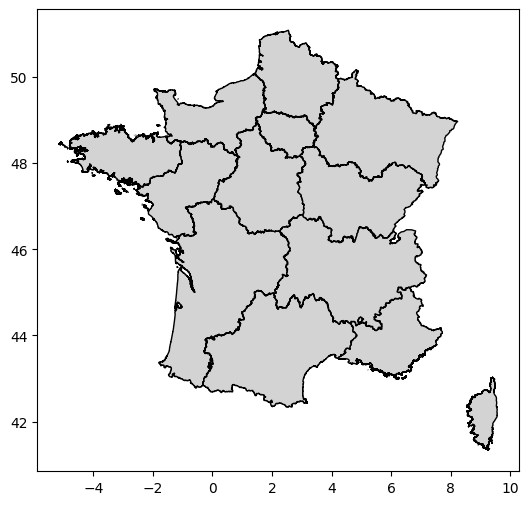

In [8]:
ax = make_fond_carte(reg_sans_dom)

shp_sans_dom['annee_de_cr'] = pd.to_datetime(shp_sans_dom['annee_de_cr'], errors='coerce')
shp_sans_dom = shp_sans_dom.dropna(subset=['annee_de_cr'])

shp_sans_dom = shp_sans_dom.dropna(subset=['annee_de_cr'])
emplacements = shp_sans_dom[shp_sans_dom['annee_de_cr'] == 1869]
layer = emplacements.plot(ax=ax, color='red', marker='o', markersize=5)



ValueError: aspect must be finite and positive 

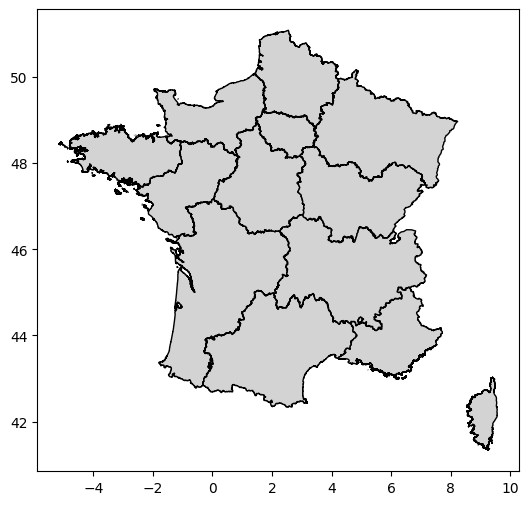

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
reg_sans_dom.plot(ax=ax, color='lightgray', edgecolor='black')
shp_sans_dom['annee_de_cr'] = pd.to_datetime(shp_sans_dom['annee_de_cr'], errors='coerce')
shp_sans_dom = shp_sans_dom.dropna(subset=['annee_de_cr'])

emplacements = shp_sans_dom[shp_sans_dom['annee_de_cr'] == 1869]
emplacements.plot(ax=ax, color='red', marker='o', markersize=5)

plt.show()

annee_min= 1869
annee_max= 2022
total_years= 154


ValueError: aspect must be finite and positive 

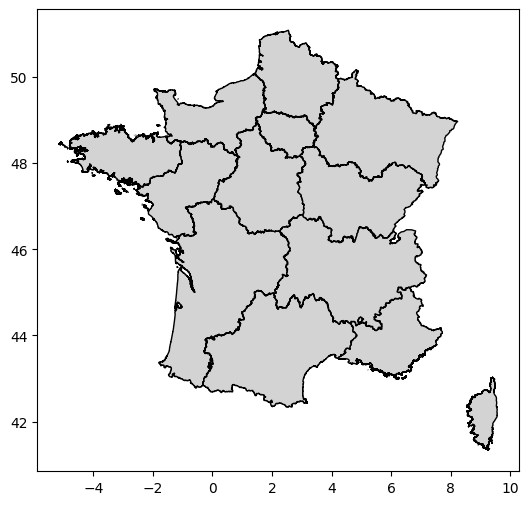

In [46]:
# Chargement du fond de carte de la France 
france_map = reg_sans_dom

shp_sans_dom['annee_de_cr'] = pd.to_datetime(shp_sans_dom['annee_de_cr'], errors='coerce')
shp_sans_dom = shp_sans_dom.dropna(subset=['annee_de_cr'])

# Définir le nombre total d'années pour l'animation
annee_min = shp_sans_dom['annee_de_cr'].dt.year.min()
print("annee_min=", annee_min)
annee_max = shp_sans_dom['annee_de_cr'].dt.year.max()
print("annee_max=", annee_max)

total_years = annee_max - annee_min + 1
print("total_years=", total_years)

#On importe le fond de carte de la France
fig, ax = make_fond_carte(reg_sans_dom)

def update(frame):
    #ax.clear()
    #france_map.boundary.plot(ax=ax)
    print("frame =", frame)
    print("annee", shp_sans_dom['annee_de_cr'].dt.year.min() + frame)
    
    # Appeler votre fonction existante pour afficher la carte pour une année spécifique
    layer = carte(shp_sans_dom, ax, shp_sans_dom['annee_de_cr'].dt.year.min() + frame)
    print("test")
    return [layer]
    #ax.set_aspect('equal')



#test--
shp_sans_dom['annee_de_cr'] = pd.to_datetime(shp_sans_dom['annee_de_cr'], errors='coerce')
layer = carte(shp_sans_dom, ax, 1869)




In [34]:

# Création de la figure et de l'axe initial
#france_map.boundary.plot(ax=ax)

# Création de l'animation
anim = FuncAnimation(fig, update, frames=total_years, repeat=False)

# Afficher l'animation
anim.save("test.html")
#anim.save('animation.mp4')

#plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


frame = 0
annee 1869


IndexError: list index out of range